In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest,chi2

In [2]:
df=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

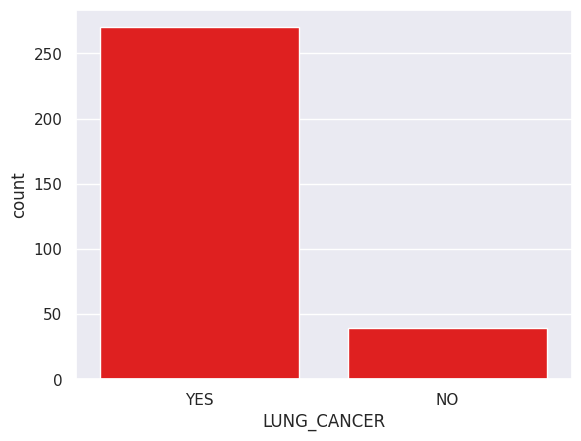

In [6]:
sns.set()
sns.countplot(data=df,x="LUNG_CANCER",color="red")

In [7]:
encoder=LabelEncoder()

In [8]:
df["LUNG_CANCER"]=encoder.fit_transform(df["LUNG_CANCER"])
df["GENDER"]=encoder.fit_transform(df["GENDER"])

In [9]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [10]:
x=df.drop("LUNG_CANCER",axis=1)
y=df["LUNG_CANCER"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [12]:
sc=StandardScaler()

In [13]:
X_train_scaled=sc.fit_transform(X_train)
x_test_scaled=sc.fit_transform(X_test)

# LogisticRegression model

In [14]:
classifer1=LogisticRegression()

In [15]:
classifer1.fit(X_train_scaled,y_train)

LogisticRegression()

In [16]:
classifer1.score(X_train_scaled,y_train)

0.9271255060728745

In [17]:
classifer1.score(x_test_scaled,y_test)

0.9354838709677419

In [18]:
y_pred=classifer1.predict(x_test_scaled)

In [19]:
pd.DataFrame({"y_pred":y_pred,"y_test":y_test})

,y_pred,y_test
288,1,1
9,1,1
57,1,1
60,1,1
25,1,1
...,...,...
198,1,1
195,1,1
210,0,1
224,1,1


In [20]:
classfier3=LogisticRegression(C=1,penalty="l2")

In [21]:
classfier3.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

In [22]:
classfier3.score(X_train_scaled,y_train)

0.9271255060728745

In [23]:
classfier3.score(x_test_scaled,y_test)

0.9354838709677419

In [24]:
y_pred=classfier3.predict(x_test_scaled)

In [25]:
y_pred=classfier3.predict(x_test_scaled)

In [26]:
pd.DataFrame({"y_pred":y_pred,"y_test":y_test})

,y_pred,y_test
288,1,1
9,1,1
57,1,1
60,1,1
25,1,1
...,...,...
198,1,1
195,1,1
210,0,1
224,1,1


In [27]:
score_train=[]
score_test=[]
i=0.1
while i<1:
     classifer2=LogisticRegression(C=i)
     classifer2.fit(X_train_scaled,y_train)
     score_train.append(classifer2.score(X_train_scaled,y_train))
     score_test.append(classifer2.score(x_test_scaled,y_test))
     i=i+0.1

In [28]:
print(score_train)
print(score_test)

[0.9149797570850202, 0.9230769230769231, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745]
[0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9516129032258065, 0.9516129032258065, 0.9516129032258065, 0.9354838709677419, 0.9354838709677419]


# knn model

In [29]:
score_train=[]
score_test=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    score_train.append(knn.score(X_train_scaled,y_train))
    score_test.append(knn.score(x_test_scaled,y_test))
    

[]

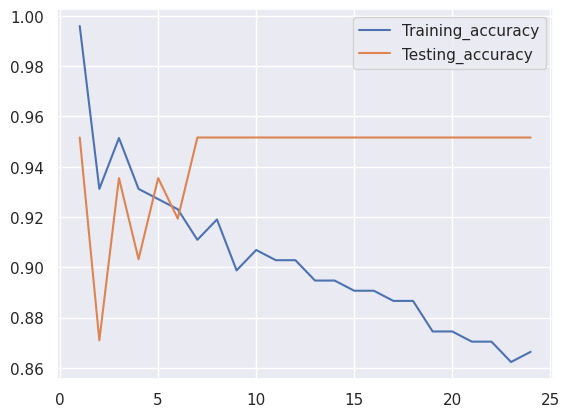

In [30]:
x=[i for i in range(1,25)]
plt.plot(x,score_train,label='Training_accuracy')
plt.plot(x,score_test,label='Testing_accuracy')
plt.legend()
plt.plot()

# svm model

In [31]:
classifer4=SVC()

In [32]:
classifer4.fit(X_train_scaled,y_train)

SVC()

In [33]:
classifer4.score(X_train_scaled,y_train)

0.9473684210526315

In [34]:
classifer4.score(x_test_scaled,y_test)

0.9354838709677419

In [35]:
classifer5=SVC(C=0.1,kernel="rbf")

In [36]:
classifer5.fit(X_train_scaled,y_train)

SVC(C=0.1)

In [37]:
classifer5.score(X_train_scaled,y_train)

0.8502024291497976

In [38]:
classifer5.score(x_test_scaled,y_test)

0.967741935483871

In [39]:
classifer6=SVC(C=0.1,kernel="linear")

In [40]:
classifer6.fit(X_train_scaled,y_train)

SVC(C=0.1, kernel='linear')

In [41]:
classifer6.score(X_train_scaled,y_train)

0.9433198380566802

In [42]:
classifer6.score(x_test_scaled,y_test)

0.9516129032258065

 # naive_bayes model

In [43]:
classfier7=GaussianNB()

In [44]:
classfier7.fit(X_train_scaled,y_train)

GaussianNB()

In [45]:
classfier7.score(X_train_scaled,y_train)

0.8906882591093117

In [46]:
classfier7.score(x_test_scaled,y_test)

0.9354838709677419

# xgboost

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

0.9959514170040485
0.9838709677419355


# adaboost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
print(ada.score(X_train,y_train))
print(ada.score(X_test,y_test))

0.9271255060728745
0.9838709677419355


In [49]:
ada=AdaBoostClassifier(n_estimators=10,learning_rate=0.60)
ada.fit(X_train,y_train)
print(ada.score(X_train,y_train))
print(ada.score(X_test,y_test))

0.8987854251012146
0.967741935483871


# decision tree model

In [50]:
dt=DecisionTreeClassifier(max_depth=6,max_features=4)
dt.fit(X_train_scaled,y_train)
print(dt.score(X_train_scaled,y_train))
print(dt.score(x_test_scaled,y_test))

0.9392712550607287
0.9032258064516129


[]

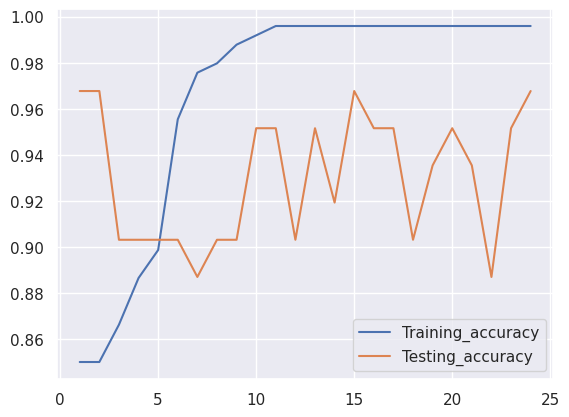

In [51]:
train_score=[]
test_score=[]
for i in range(1,25):
    dt=DecisionTreeClassifier(max_depth=i,max_features=4)
    dt.fit(X_train_scaled,y_train)
    train_score.append(dt.score(X_train_scaled,y_train))
    test_score.append(dt.score(x_test_scaled,y_test))
x=[i for i in range(1,25)]
plt.plot(x,train_score,label='Training_accuracy')
plt.plot(x,test_score,label='Testing_accuracy')
plt.legend()
plt.plot()


[Text(0.6415094339622641, 0.9545454545454546, 'x[8] <= -0.069\ngini = 0.255\nsamples = 247\nvalue = [37, 210]'),
 Text(0.41509433962264153, 0.8636363636363636, 'x[3] <= -0.085\ngini = 0.402\nsamples = 115\nvalue = [32, 83]'),
 Text(0.25, 0.7727272727272727, 'x[10] <= -0.085\ngini = 0.494\nsamples = 45\nvalue = [20, 25]'),
 Text(0.16037735849056603, 0.6818181818181818, 'x[12] <= -0.338\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.07547169811320754, 0.5909090909090909, 'x[1] <= 0.466\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.03773584905660377, 0.5, 'x[4] <= 0.045\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.018867924528301886, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.05660377358490566, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11320754716981132, 0.5, 'x[2] <= -0.135\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.09433962264150944, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]

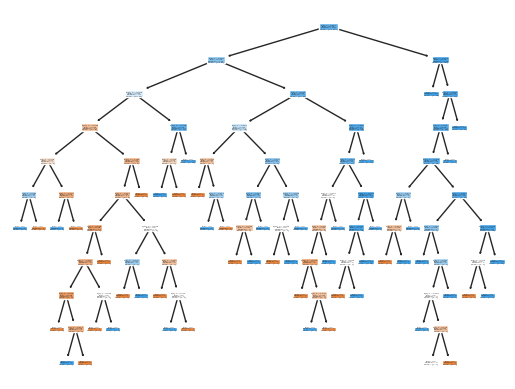

In [52]:
from sklearn import tree
tree.plot_tree(dt,filled=True)

# random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=27,max_depth=6,max_features=7)
rf.fit(X_train_scaled ,y_train)
print(rf.score(X_train_scaled,y_train))
print(rf.score(x_test_scaled,y_test))

0.979757085020243
0.9516129032258065


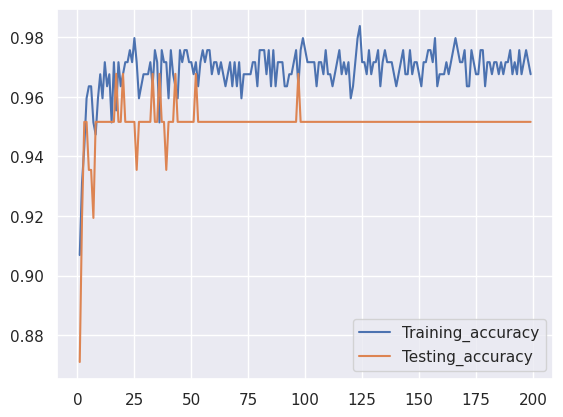

<Figure size 1500x1000 with 0 Axes>

In [54]:
train_score=[]
test_score=[]
for i in range(1,200):
    rf=RandomForestClassifier(n_estimators=i,max_depth=6,max_features=4)
    rf.fit(X_train_scaled,y_train)
    train_score.append(rf.score(X_train_scaled,y_train))
    test_score.append(rf.score(x_test_scaled,y_test))
x=[i for i in range(1,200)]
plt.plot(x,train_score,label='Training_accuracy')
plt.plot(x,test_score,label='Testing_accuracy')
plt.legend()
plt.plot()
plt.figure(figsize=(15,10))
plt.show()

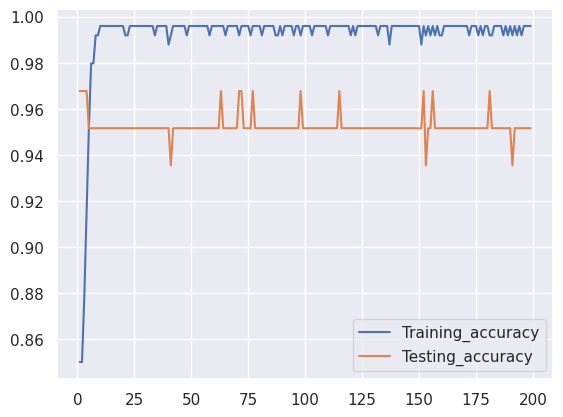

<Figure size 1500x1000 with 0 Axes>

In [55]:
train_score=[]
test_score=[]
for i in range(1,200):
    rf=RandomForestClassifier(n_estimators=27,max_depth=i,max_features=4)
    rf.fit(X_train_scaled,y_train)
    train_score.append(rf.score(X_train_scaled,y_train))
    test_score.append(rf.score(x_test_scaled,y_test))
x=[i for i in range(1,200)]
plt.plot(x,train_score,label='Training_accuracy')
plt.plot(x,test_score,label='Testing_accuracy')
plt.legend()
plt.plot()
plt.figure(figsize=(15,10))
plt.show()

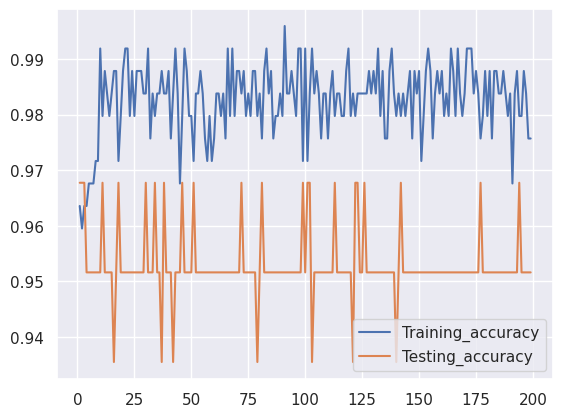

<Figure size 1500x1000 with 0 Axes>

In [56]:
train_score=[]
test_score=[]
for i in range(1,200):
    rf=RandomForestClassifier(n_estimators=27,max_depth=6,max_features=i)
    rf.fit(X_train_scaled,y_train)
    train_score.append(rf.score(X_train_scaled,y_train))
    test_score.append(rf.score(x_test_scaled,y_test))
x=[i for i in range(1,200)]
plt.plot(x,train_score,label='Training_accuracy')
plt.plot(x,test_score,label='Testing_accuracy')
plt.legend()
plt.plot()
plt.figure(figsize=(15,10))
plt.show()

In [57]:
y_pred=rf.predict(x_test_scaled)
pd.DataFrame({"y_pred":y_pred,"y_test":y_test}).head(60)

,y_pred,y_test
288,1,1
9,1,1
57,1,1
60,1,1
25,1,1
63,1,1
92,1,1
184,1,1
244,1,1
46,1,1


# voting

In [58]:
classfier=[
   classifer1,
    knn,
   classifer4,
    xgb
]
voting_classifer1=VotingClassifier(estimators=[("classifer1",classifer1),("knn",knn),("classifer4",classifer4),("xgb",xgb)], voting='hard')
voting_classifer1.fit(X_train_scaled,y_train)
print(voting_classifer1.score(X_train_scaled,y_train))
print(voting_classifer1.score(x_test_scaled,y_test))
print(voting_classifer1.predict(x_test_scaled))
x=voting_classifer1.predict(x_test_scaled)



0.951417004048583
0.9354838709677419
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
classfier=[
   classifer1,
    knn,
   xgb
]
voting_classifer=VotingClassifier(estimators=[("classifer1",classifer1),("knn",knn),("XGB",xgb)], voting='soft')
voting_classifer.fit(X_train_scaled,y_train)
print(voting_classifer.score(X_train_scaled,y_train))
print(voting_classifer.score(x_test_scaled,y_test))
print(voting_classifer.predict(x_test_scaled))
x=voting_classifer.predict(x_test_scaled)

0.9554655870445344
0.9193548387096774
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [60]:
input_data = np.array([0	,56,	1,	1,	1,	2,	2,	2,	1,	1,	2,	2,	2,	2,	1	]).reshape(1, -1)

# التنبؤ باستخدام النموذج
target = voting_classifer.predict(input_data)

# طباعة النتيجة بناءً على التنبؤ
if target[0] == 0:
    print("healthy")
else:
    print("not healthy")

not healthy


In [61]:
from sklearn.metrics import confusion_matrix,classification_report
con=confusion_matrix(y_test,voting_classifer1.predict(x_test_scaled))
con

array([[ 1,  1],
       [ 3, 57]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

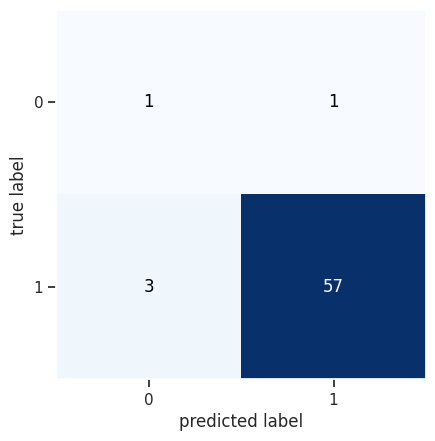

In [62]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con)

In [63]:
con2=confusion_matrix(y_test,xgb.predict(x_test_scaled))
con2

array([[ 2,  0],
       [60,  0]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

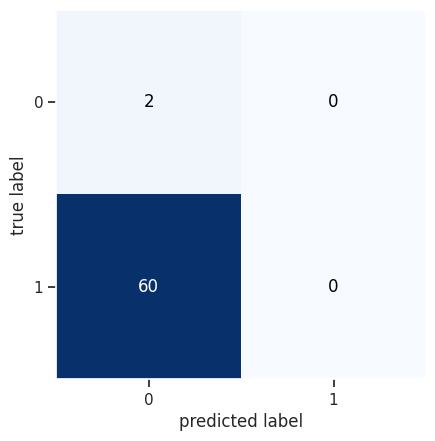

In [64]:
plot_confusion_matrix(con2)

In [65]:
print(classification_report(y_test,voting_classifer1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



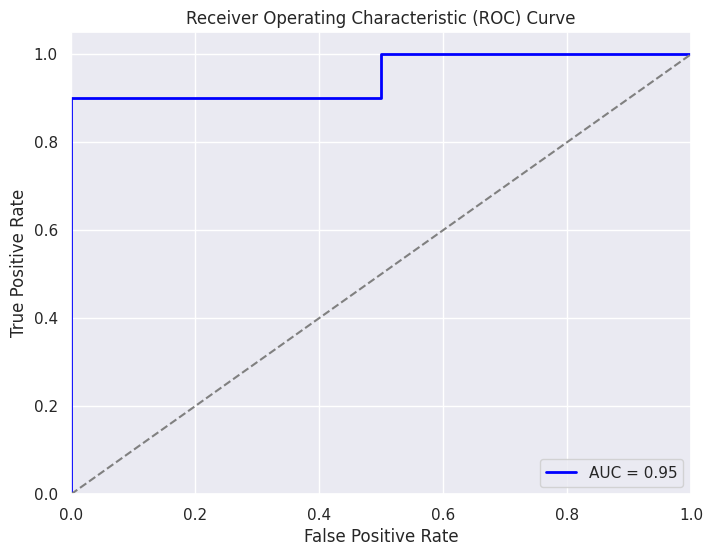

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split


# Get predicted probabilities for positive class
y_pred_probs = xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
